In [1]:
# Support vector machine
# mnist dataset

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame = False)
mnist.keys()

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
x, y = mnist['data'], mnist['target']

print(x.shape)
print(y.shape)

(70000, 784)
(70000,)


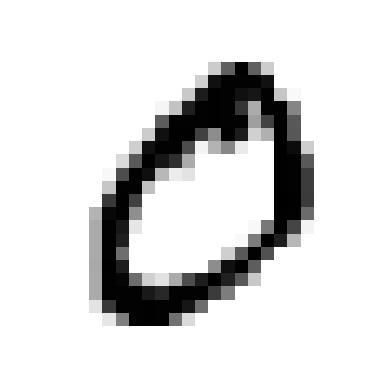

In [5]:
# show image
some_digit = x[1]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap='binary')
plt.axis('off')
plt.show()

In [6]:
# change y to int
y = y.astype(np.uint8)

# split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [7]:
# train
clf = svm.SVC()
clf.fit(x_train, y_train)

# predict
y_pred = clf.predict(x_test)

# accuracy
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9793571428571428


In [8]:
# confusion matrix
print('\nConfusion matrix:\n', metrics.confusion_matrix(y_test, y_pred))
print('\nClassification report:\n', metrics.classification_report(y_test, y_pred))


Confusion matrix:
 [[1375    1    0    0    1    2    5    1    5    2]
 [   1 1584    5    4    2    0    0    1    1    1]
 [   5    2 1395    2    4    0    2   10    7    1]
 [   1    2    8 1396    0   15    1    7   12    2]
 [   1    3    3    0 1341    0    2    1    0   12]
 [   2    0    1   13    2 1209    9    1    6    0]
 [   7    2    1    0    2    2 1335    0    1    0]
 [   0    4    7    3    6    1    0 1438    1    7]
 [   1    6    2    6    4    5    2    1 1293    6]
 [   4    2    0    6   10    4    0   10    7 1345]]

Classification report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1392
           1       0.99      0.99      0.99      1599
           2       0.98      0.98      0.98      1428
           3       0.98      0.97      0.97      1444
           4       0.98      0.98      0.98      1363
           5       0.98      0.97      0.97      1243
           6       0.98      0.99      0.99  